ANLY 590 \
HW 1 \
Masha Gubenko



**Question 1**

*Using the accompanying Hitters dataset, we will explore
regression models to predict a player’s Salary from other variables. You must python.*

The code below loads the necessary packages for data loading and processing.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The code below loads the data directly from the github link.

In [6]:
#Loading the data
url_data = 'https://gist.githubusercontent.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad/raw/d9bcf657f97201394a59fffd801c44347eb7e28d/Hitters.csv'
hit_data = pd.read_csv(url_data) #reading in the data

#Cleaning the data
hit_data = hit_data.dropna() #droping all empty values
hit_data = hit_data.reset_index(drop=True) #reseting the row index
hit_data = hit_data.drop(columns = ['Unnamed: 0','League','Division','NewLeague']) #removing the non numeric columns
hit_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


**Question 1.1**

The code below imports the Lasso and LassoCV model packages from sklearn. Then, I set up the numeric variables as predictors and the *Salary* variable values as the outcome variable. I then use LassoCV to identify the optimal $\lambda$ to use for my lasso regression.

In [11]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

valueArray = hit_data.values
X = valueArray[:, 0:16] #get all of the variables except salary
Y = valueArray[:, 16] #save the salary variable separately

#Split the dataset into train and test portions
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=0.4, random_state=7) 

#Setting up the array of potential lambdas
lambdas = np.arange(0.1,100,0.01) 

#Set up the lasso regression using cross validation to determine the right lambda
lassocv = LassoCV(alphas = lambdas, cv = 5, max_iter = 10000, normalize=True)

#Fit the model on the training data
lassocv.fit(X_train, Y_train)
alph = lassocv.alpha_ #identify the best lambda
print(alph)

2.529999999999999


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6427.242972508073, tolerance: 3401.2959965992886
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4771.829326059669, tolerance: 3401.2959965992886
  positive)


Text(0, 0.5, 'coefficients')

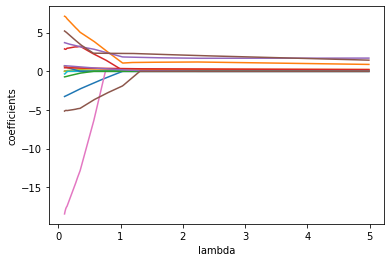

In [12]:
#Plotting the coefficients at different lambda levels
lambdas = np.arange(0.1,5,0.01) #array of potential lambdas
temp = [] #empty array for coefficients

for i in lambdas:
  lasso = Lasso(alpha = i, normalize = True)
  lasso.fit(X_train, Y_train)

  temp.append(lasso.coef_)

fig = plt.figure()
ax = plt.axes()
ax.plot(lambdas, temp)
plt.xlabel('lambda')
plt.ylabel('coefficients')

In [35]:
#Set up the lasso model using the best lambda
lasso = Lasso(alpha = alph, normalize=True)
lasso.fit(X_train,Y_train) #fit the new model to the training data

predictions = lasso.predict(X_validate) #run the model on the test set
print(mean_squared_error(Y_validate, predictions)) #calculate the MSE

#Fitting the model to the test set
lasso.fit(X_validate,Y_validate)
pd.Series(lasso.coef_, index = hit_data.columns[:-1]) #calculate the coefficients 

102573.09780088905


AtBat      0.000000
Hits       1.554669
HmRun     -0.000000
Runs       0.000000
RBI        0.000000
Walks      1.937641
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     1.521905
CRuns      0.495128
CRBI       0.000000
CWalks     0.000000
PutOuts    0.095819
Assists   -0.000000
Errors    -0.000000
dtype: float64

We can see after running the lasso model using the best identified lambda that we only have 5 out of 16 predictors left with non zero coefficients. It makes sense that hits, walks, CRBI and CRuns are significnat predictors for the salary variable. 

**Question 1.2**

*Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.*

The code below imports Ridge from sklearn. I set up the numeric variables as predictors for the Salary variable.

In [38]:
from sklearn.linear_model import Ridge, RidgeCV 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

valueArray = hit_data.values
X = valueArray[:, 0:16] #get all of the variables except salary
Y = valueArray[:, 16] #save the salary variable separately

#Split the dataset into train and test portions
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=0.4, random_state=7) 

#Setting up the array of potential lambdas
lambdas = np.arange(0.01,100,0.01) 

#Set up the ridge regression using cross validation to determine the right lambda
ridgecv = RidgeCV(alphas = lambdas, cv=5, normalize = True)

#Fit the model on the training data
ridgecv.fit(X_train, Y_train)
alph = ridgecv.alpha_ #identifying the best lambda
print(alph)

0.05


Text(0, 0.5, 'coefficients')

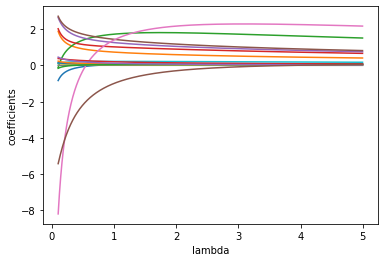

In [39]:
#Plotting the coefficients at different lambda levels
lambdas = np.arange(0.1,5,0.005) #array of potential lambdas
temp = [] #empty array for coefficients

for i in lambdas:
  ridge = Ridge(alpha = i, normalize = True)
  ridge.fit(X_train, Y_train)

  temp.append(ridge.coef_)

fig = plt.figure()
ax = plt.axes()
ax.plot(lambdas, temp)
plt.xlabel('lambda')
plt.ylabel('coefficients')

In [40]:
#Set up the ridge model using the best lambda
ridge = Ridge(alpha = alph, normalize = True)
ridge.fit(X_train,Y_train) #fit the new model to the training data

predictions = ridge.predict(X_validate) #run the model on the test set
mean_squared_error(Y_validate, predictions) #calculate the MSE

104454.8951754281

In [41]:
ridge.fit(X_validate, Y_validate) #fit the final model to the entire dataset
pd.Series(ridge.coef_, index = hit_data.columns[:-1]) #calculate the coefficients 

AtBat      -0.014002
Hits        2.087751
HmRun     -10.913321
Runs        1.626998
RBI        -0.632325
Walks       2.681258
Years      -4.112397
CAtBat     -0.026834
CHits       0.078688
CHmRun      2.225243
CRuns       0.538389
CRBI        0.132934
CWalks     -0.163643
PutOuts     0.191372
Assists    -0.363527
Errors      3.688295
dtype: float64

**Question 1.3**

*Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.*

The bias measures the difference between the predictions of the model and the true values the model is trying to predict. The higher the bias the less the model fits the training data. On the other hand, variance measures the variability of the prediction for each of the data points. In other words, it measure how much model overfits. \

The bias/variance tradeoff is effectively a tradeoff of how each model is underfiting or overfitting the data. Higher variance/lower bias means the model is underfiting, whereas the lower variance/higher bias means that the model is overfitting. \

It is a balance to choose the right model that balances the bias and variance. As we can see from the Lasso & Ridge examples above, the choice alpha is crucial to managing the bias/variance tradeoff. We can chose an alpha that fits the training data really well, but does not perform well on the test data. 